## Gene Ontology Analysis

### Installations

In [2]:
library(matrixStats)
library("randomForest")
library(e1071)
library(plotROC)

#install.packages("tidyverse")
library(tidyverse)
library(modelr)
# Data Handling

if (!requireNamespace("BiocManager"))
    install.packages("BiocManager")
BiocManager::install()
library(BiocManager)
# General bioinformatics packages

library(BSgenome)
library(BSgenome.Hsapiens.UCSC.hg19)
# Human genome build GChr37

library(biomaRt)


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
“package ‘e1071’ was built under R version 3.5.2”Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1     ✔ purrr   0.2.5
✔ tidyr   0.8.2     ✔ dplyr   0.7.8
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ tibble  2.0.1     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()  masks randomForest::combine()
✖ dplyr::count()    masks matrixStats::count()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ ggplot2::margin() masks randomForest::margin()
Loading required namespace: BiocManager
Bioconductor version 3.8 (BiocManager 1.30.3), R 3.5.1 (2018-07-02)
Update old pack

In [3]:
source("TMB_Funcs.txt")
# My Stuff!

path_name <- "/Volumes/CCG8/processed_data"
genome <- BSgenome.Hsapiens.UCSC.hg19
ensembl = useMart("ensembl", dataset = "hsapiens_gene_ensembl")
select <- dplyr::select

### Load Data

In [6]:
three_cancer_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/three_cancer_data")
lung_data <- read_rds("/Users/jacobbradley/Documents/CCG/Data/lung_data")
tmb_panel <- read_tsv("/Users/jacobbradley/Documents/CCG/Data/TMB_panel_genes")$panel

Parsed with column specification:
cols(
  panel = col_character()
)


In [6]:
# BiocManager::install("topGO")
library(topGO)

## Gene Ontology
### 1. Scoreless, gene panel as "interesting genes" 

In [18]:
ontology = "BP"
gene_names <- all_lung_stats$Hugo_Symbol
panel <- get_gene_panel_for_size(all_lung_stats, method_cor_length_n, 2.5 * 10**5)
gene_list <- factor(as.integer(gene_names %in% panel))
names(gene_list) <- gene_names
nodeSize <- 10
description <- "TMB panel GO analysis"

In [24]:
write_tsv(tibble(panel = unlist(panel)), "/Users/jacobbradley/Documents/CCG/Data/2.5Mpanel")

In [102]:
nsclc_tmb_go <- new("topGOdata", description = description, ontology = ontology, 
                    allGenes = gene_list, nodeSize = nodeSize, annot = annFUN.org, 
                    mapping = "org.Hs.eg.db", ID = "symbol")
nsclc_tmb_go_mf <- new("topGOdata", description = description, ontology = "MF", 
                    allGenes = gene_list, nodeSize = nodeSize, annot = annFUN.org, 
                    mapping = "org.Hs.eg.db", ID = "symbol")


Building most specific GOs .....
	( 11707 GO terms found. )

Build GO DAG topology ..........
	( 15753 GO terms and 37389 relations. )

Annotating nodes ...............
	( 14852 genes annotated to the GO terms. )


In [360]:
resultFisher <- runTest(nsclc_tmb_go, algorithm = "classic", statistic = "fisher")
resultFisher_mf <- runTest(nsclc_tmb_go_mf, algorithm = "classic", statistic = "fisher")
resultKS <- runTest(nsclc_tmb_go, algorithm = "classic", statistic = "ks")
resultKS_mf <- runTest(nsclc_tmb_go_mf, algorithm = "classic", statistic = "ks")
resultKS.elim <- runTest(nsclc_tmb_go, algorithm = "elim", statistic = "ks")
resultKS.elim_mf <- runTest(nsclc_tmb_go_mf, algorithm = "elim", statistic = "ks")


			 -- Classic Algorithm -- 

		 the algorithm is scoring 350 nontrivial nodes
		 parameters: 
			 test statistic: fisher


In [381]:
allRes <- GenTable(nsclc_tmb_go, classicFisher = resultFisher,
    classicKS = resultKS, elimKS = resultKS.elim,
    orderBy = "classicFisher", ranksOf = "classicFisher", topNodes = 30)

allRes_mf <- GenTable(nsclc_tmb_go_mf, classicFisher = resultFisher_mf,
    classicKS = resultKS_mf, elimKS = resultKS.elim_mf,
    orderBy = "elimKS", ranksOf = "classicFisher", topNodes = 30)

In [383]:
allRes 

GO.ID,Term,Annotated,Significant,Expected,classicFisher,classicKS,elimKS
GO:0050911,detection of chemical stimulus involved ...,357,74,4.40,< 1e-30,0.00029,0.00029
GO:0007608,sensory perception of smell,381,74,4.69,< 1e-30,0.00022,0.06890
GO:0050907,detection of chemical stimulus involved ...,404,75,4.98,< 1e-30,0.00036,0.34752
GO:0050906,detection of stimulus involved in sensor...,454,76,5.59,< 1e-30,0.00045,0.19144
GO:0009593,detection of chemical stimulus,436,75,5.37,< 1e-30,8.2e-05,0.07435
GO:0007606,sensory perception of chemical stimulus,449,75,5.53,< 1e-30,0.00091,0.09543
GO:0051606,detection of stimulus,600,78,7.39,< 1e-30,0.00035,0.26455
GO:0007600,sensory perception,860,79,10.60,< 1e-30,0.00037,0.02726
GO:0007186,G protein-coupled receptor signaling pat...,1187,83,14.63,< 1e-30,3.5e-06,0.01126
GO:0050877,nervous system process,1270,84,15.65,< 1e-30,4.8e-10,0.03448


In [365]:
allRes_mf

GO.ID,Term,Annotated,Significant,Expected,Rank in classicFisher,classicFisher,classicKS,elimKS
GO:0005524,ATP binding,1396,5,16.36,333,1.00,4.0e-18,4.0e-18
GO:0004714,transmembrane receptor protein tyrosine ...,64,0,0.75,348,1.00,5.6e-16,2.6e-16
GO:0005509,calcium ion binding,634,8,7.43,150,0.47,4.2e-12,4.2e-12
GO:0046934,"phosphatidylinositol-4,5-bisphosphate 3-...",67,1,0.79,167,0.55,1.2e-09,1.2e-09
GO:0005516,calmodulin binding,182,0,2.13,349,1.00,2.6e-09,2.6e-09
GO:0046872,metal ion binding,3769,29,44.16,316,1.00,8.2e-20,5.5e-09
GO:0016303,1-phosphatidylinositol-3-kinase activity,46,0,0.54,350,1.00,2.7e-08,2.7e-08
GO:0008013,beta-catenin binding,76,0,0.89,351,1.00,1.7e-07,1.7e-07
GO:0005201,extracellular matrix structural constitu...,147,1,1.72,234,0.82,9.7e-10,1.5e-06
GO:0004970,ionotropic glutamate receptor activity,19,0,0.22,352,1.00,4.2e-06,4.2e-06


## Nirmesh's Pictures

### Figure 1- Threshold 20

In [10]:
panel_lin_mod <- get_gene_model(panel, lung_data[["training_data"]])
panel_rf_mod <- get_gene_f_model(panel, lung_data[["training_data"]])
panel_svm_mod <- get_gene_svm_model(panel, lung_data[["training_data"]])

test_matrix <- get_gene_matrix(lung_data[["test_data"]], panel)

ERROR: Error in get_gene_matrix(data, model_genes): object 'panel' not found


In [ ]:
train_matrix <- get_gene_matrix(lung_data[["training_data"]], panel)

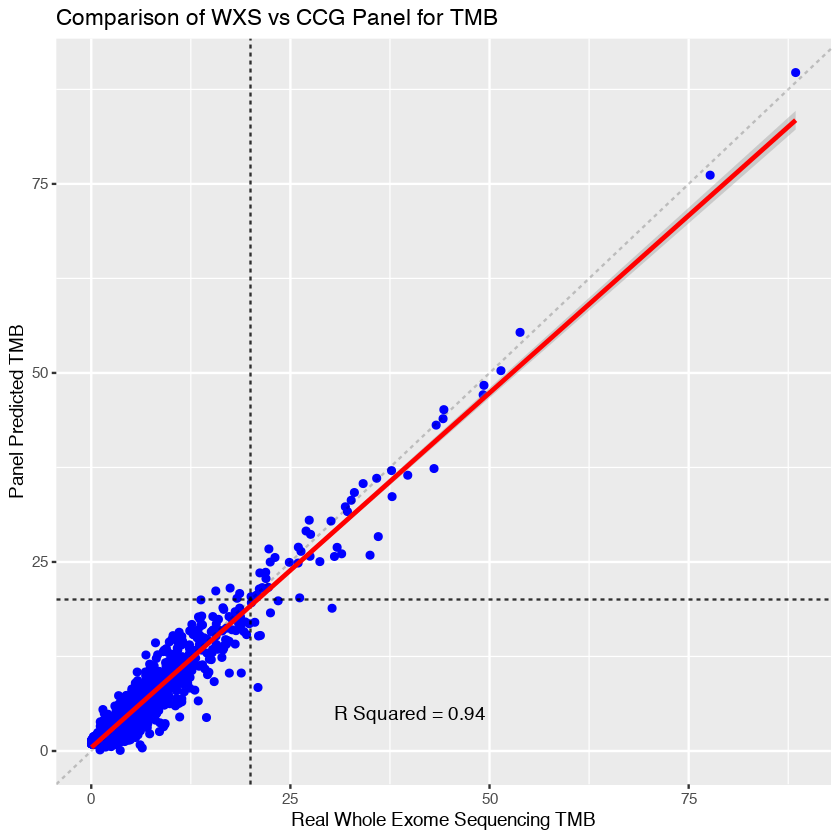

In [379]:
testModel(panel_lin_mod, train_matrix, type = "W") %>% 
    {ggplot(., aes(x = actual, y = prediction)) + geom_point(colour = "blue") + 
    labs(x = "Real Whole Exome Sequencing TMB", y = "Panel Predicted TMB") + 
    geom_abline(intercept = 0, slope = 1, alpha = 0.2, linetype = 2) +
    geom_hline(yintercept = 20, alpha = 0.8, linetype = 2) + geom_vline(xintercept = 20, alpha = 0.8, linetype = 2) + 
    geom_smooth(method = "lm", colour = "red") + labs(title = "Comparison of WXS vs CCG Panel for TMB") +
    annotate("text", x = 40, y = 5, label = paste("R Squared =", round(broom::glance(lm(.$actual ~ .$prediction))$r.squared, 2)))}



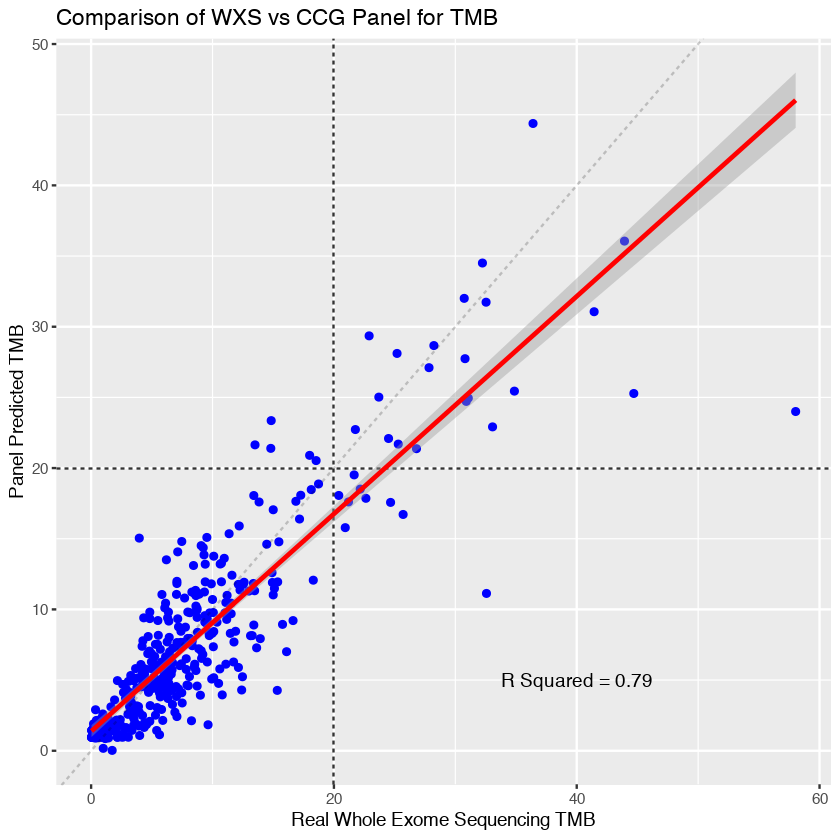

In [273]:
testModel(panel_lin_mod, test_matrix, type = "W") %>% 
    {ggplot(., aes(x = actual, y = prediction)) + geom_point(colour = "blue") + 
    labs(x = "Real Whole Exome Sequencing TMB", y = "Panel Predicted TMB") + 
    geom_abline(intercept = 0, slope = 1, alpha = 0.2, linetype = 2) +
    geom_hline(yintercept = 20, alpha = 0.8, linetype = 2) + geom_vline(xintercept = 20, alpha = 0.8, linetype = 2) + 
    geom_smooth(method = "lm", colour = "red") + labs(title = "Comparison of WXS vs CCG Panel for TMB") +
    annotate("text", x = 40, y = 5, label = paste("R Squared =", round(broom::glance(lm(.$actual ~ .$prediction))$r.squared, 2)))}



In [304]:
cp_20 <- testModel(panel_lin_mod, test_matrix, type = "Con")
cc_20 <- cp_20
cc_20[,c("Predicted_High", "Predicted_Low")]  <- nrow(test_matrix) * cc_20[,c("Predicted_High", "Predicted_Low")]

ss_20 <- testModel(panel_lin_mod, test_matrix, type = "C")

cp_20
cc_20
ss_20


Actual,Predicted_High,Predicted_Low
High,0.05250597,0.02147971
Low,0.01193317,0.91408115


Actual,Predicted_High,Predicted_Low
High,22,9
Low,5,383


$sensitivity
[1] 0.7096774

$specificity
[1] 0.9871134

In [11]:
lin_auc_20 <- testModel(panel_lin_mod, test_matrix, type = "AUC", threshold = 20)
rf_auc_20 <- testModel(panel_rf_mod, test_matrix, type = "AUC", threshold = 20)
svm_auc_20 <- testModel(panel_svm_mod, test_matrix, type = "AUC", threshold = 20)

get_roc(list(panel_lin_mod, panel_rf_mod, panel_svm_mod), lung_data[["test_data"]], panel, threshold = 20) +
    labs(title = "ROC Curves for Linear (1), Random Forest (2) and SVM (3) \n Models as Predictors of TMB-H (>20) Status") +
    annotate("text", x = 0.7, y = 0.3, label = paste(" Linear AUC:", round(lin_auc_20, 3), "\nRF AUC:",
                                                    round(rf_auc_20,3), "\nSVM AUC:", round(svm_auc_20, 3))) + 
    geom_abline(intercept = 0, slope = 1, linetype = 2, alpha = 0.5)


ERROR: Error in predict(model, window_matrix): object 'panel_lin_mod' not found


In [310]:
b20_lung_data <- list()
b20_lung_data[["training_data"]] <- balance_data(lung_data[["training_data"]], threshold = 20)
b20_lung_data[["test_data"]] <- lung_data[["test_data"]]

In [311]:
panel_lin_mod_b20 <- get_gene_model(panel, b20_lung_data[["training_data"]])
panel_rf_mod_b20 <- get_gene_f_model(panel, b20_lung_data[["training_data"]])
panel_svm_mod_b20 <- get_gene_svm_model(panel, b20_lung_data[["training_data"]])

In [312]:
cp_20_b <- testModel(panel_svm_mod_b20, test_matrix, type = "Con")
cc_20_b <- cp_20_b
cc_20_b[,c("Predicted_High", "Predicted_Low")]  <- nrow(test_matrix) * cc_20_b[,c("Predicted_High", "Predicted_Low")]

ss_20_b <- testModel(panel_svm_mod_b20, test_matrix, type = "C")

cp_20_b
cc_20_b
ss_20_b

Actual,Predicted_High,Predicted_Low
High,0.06682578,0.007159905
Low,0.08353222,0.842482100


Actual,Predicted_High,Predicted_Low
High,28,3
Low,35,353


$sensitivity
[1] 0.9032258

$specificity
[1] 0.9097938

### Figure 1- Threshold 10

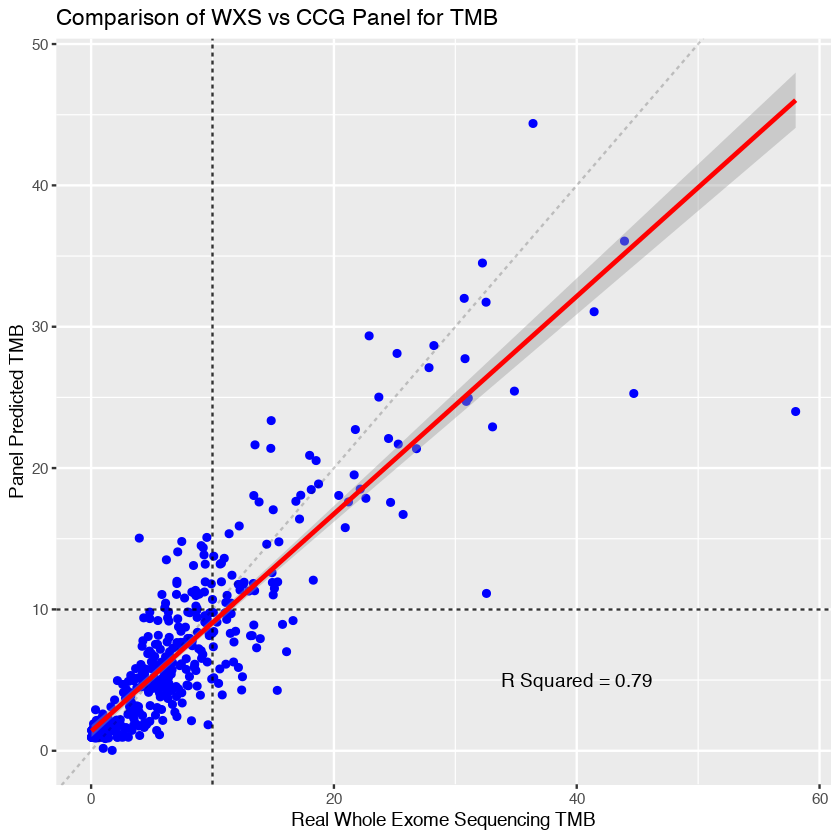

In [274]:
testModel(panel_lin_mod, test_matrix, type = "W") %>% 
    {ggplot(., aes(x = actual, y = prediction)) + geom_point(colour = "blue") + 
    labs(x = "Real Whole Exome Sequencing TMB", y = "Panel Predicted TMB") + 
    geom_abline(intercept = 0, slope = 1, alpha = 0.2, linetype = 2) +
    geom_hline(yintercept = 10, alpha = 0.8, linetype = 2) + geom_vline(xintercept = 10, alpha = 0.8, linetype = 2) + 
    geom_smooth(method = "lm", colour = "red") + labs(title = "Comparison of WXS vs CCG Panel for TMB") + 
    annotate("text", x = 40, y = 5, label = paste("R Squared =", round(broom::glance(lm(.$actual ~ .$prediction))$r.squared, 2)))}


In [309]:
cp_10 <- testModel(panel_lin_mod, test_matrix, type = "Con", threshold = 10)
cc_10 <- cp_10 
cc_10[,c("Predicted_High", "Predicted_Low")]  <- nrow(test_matrix) * cc_10[,c("Predicted_High", "Predicted_Low")]

ss_10 <- testModel(panel_lin_mod, test_matrix, type = "C", threshold = 10)

cp_10
cc_10
ss_10


Actual,Predicted_High,Predicted_Low
High,0.16945107,0.06682578
Low,0.06682578,0.69689737


Actual,Predicted_High,Predicted_Low
High,71,28
Low,28,292


$sensitivity
[1] 0.7171717

$specificity
[1] 0.9125

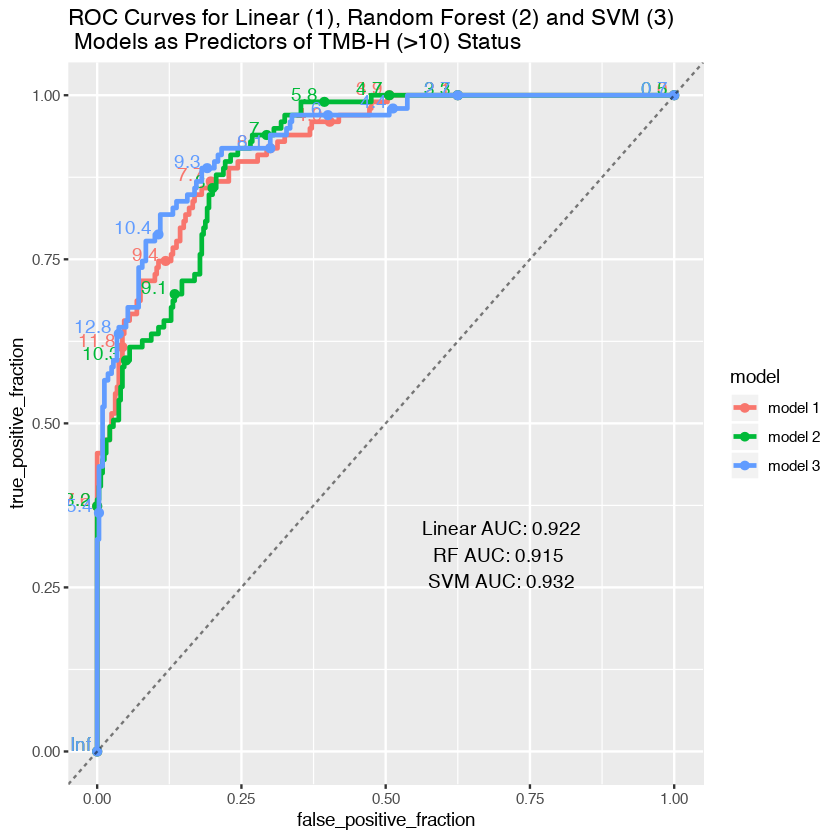

In [337]:
lin_auc_10 <- testModel(panel_lin_mod, test_matrix, type = "AUC", threshold = 10)
rf_auc_10 <- testModel(panel_rf_mod, test_matrix, type = "AUC", threshold = 10)
svm_auc_10 <- testModel(panel_svm_mod, test_matrix, type = "AUC", threshold = 10)

get_roc(list(panel_lin_mod, panel_rf_mod, panel_svm_mod), lung_data[["test_data"]], panel, threshold = 10) +
    labs(title = "ROC Curves for Linear (1), Random Forest (2) and SVM (3) \n Models as Predictors of TMB-H (>10) Status") +
    annotate("text", x = 0.7, y = 0.3, label = paste(" Linear AUC:", round(lin_auc_10, 3), "\nRF AUC:",
                                                    round(rf_auc_10,3), "\nSVM AUC:", round(svm_auc_10, 3))) + 
    geom_abline(intercept = 0, slope = 1, linetype = 2, alpha = 0.5)


In [313]:
b10_lung_data <- list()
b10_lung_data[["training_data"]] <- balance_data(lung_data[["training_data"]], threshold = 10)
b10_lung_data[["test_data"]] <- lung_data[["test_data"]]

In [315]:
panel_lin_mod_b10 <- get_gene_model(panel, b10_lung_data[["training_data"]])
panel_rf_mod_b10 <- get_gene_f_model(panel, b10_lung_data[["training_data"]])
panel_svm_mod_b10 <- get_gene_svm_model(panel, b10_lung_data[["training_data"]])

In [318]:
cp_10_b <- testModel(panel_svm_mod_b10, test_matrix, type = "Con", threshold = 10)
cc_10_b <- cp_10_b 
cc_10_b[,c("Predicted_High", "Predicted_Low")]  <- nrow(test_matrix) * cc_10_b[,c("Predicted_High", "Predicted_Low")]

ss_10_b <- testModel(panel_svm_mod_b10, test_matrix, type = "C", threshold = 10)

cp_10_b
cc_10_b
ss_10_b

Actual,Predicted_High,Predicted_Low
High,0.2076372,0.02863962
Low,0.1431981,0.62052506


Actual,Predicted_High,Predicted_Low
High,87,12
Low,60,260


$sensitivity
[1] 0.8787879

$specificity
[1] 0.8125